# Final Project

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# function for returning the amplitude in dB
def dB(x):
    return 20 * np.log10(x, dtype=float)

In [2]:
# Start matlab engine to run matlab scripts.
import matlab.engine
import matlab

eng = matlab.engine.start_matlab()

In [ ]:
# Add function paths

matlab_fnc_paths = "matlab/spfirst"
eng.addpath(matlab_fnc_paths)

## 2.2.3

In [4]:
# Basically a wrapper for the 'plotspecDB' matlab function
def plotspecDB(xx, fsamp, Lsect, DBrange):
    global eng 
    
    handle = eng.plotspecDB(xx, fsamp, Lsect, DBrange, nargout = 1)
    return handle

# generates a periodic triangle wave
# From 2.2.1 ->  tt=0:(1/fs):tStop;qq=rem(tt,T);xx=Amp*(abs(qq-(0.5*T))-0.25*T);
def gen_tri_wave(fs, tStop, T, Amp):
    tt = np.arange(0, tStop + 1/fs, 1/fs)
    qq = np.mod(tt, T)
    xx = Amp * (np.abs(qq - 0.5*T) - 0.25*T)
    return xx

In [ ]:
# Run Ryan's work for problem 2.2.1
eng.addpath("utils")
eng.run('ry_main', nargout=0)

TSECT = 0.0500 s, LSECT = 500 samples
> In plotspec (line 31)
In ry_main (line 39)
In run (line 112)
Fundamental Frequency f0 = 100.0 Hz

A1 =

   50.7774


A3 =

    5.6550

Light Index value of A1 = 50.7774 
Light Index Value of A3 = 5.655 
Ratio of A1/A3 = 9 


### Part A

Create a “dB-Spectrogram” for the 10-msec periodic triangular wave generated in Sect. 2.2.1. Use a dBrange equal to 80dB. Notice that many more spectrum lines are now visible. List the frequencies of all the harmonic spectrum lines, or give a general formula.

In [6]:
# Parameter definitions
DBrange = 80 # dB

fs    = 10000 # sampling rate
T     = 10e-3 # 10 ms period
tStop = 3 # total signal duration
Amp = 2 / T # gives triangle peak of 0.5

xx = gen_tri_wave(fs, tStop, T, Amp)

Tsect = 10*T # 0.05 seconds
Lsect =  Tsect * fs # 1000 samples

In [7]:
# Create figure
xx_mat = matlab.double(xx[:int(Lsect)].tolist())
plotspecDB(xx_mat, float(fs), float(Lsect), float(DBrange))

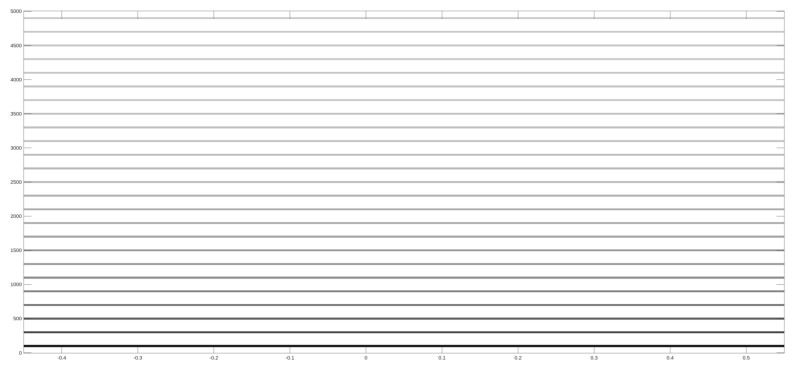

In [8]:
# display figure from saved image
img = Image.open("images/spectrogram_dB1.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

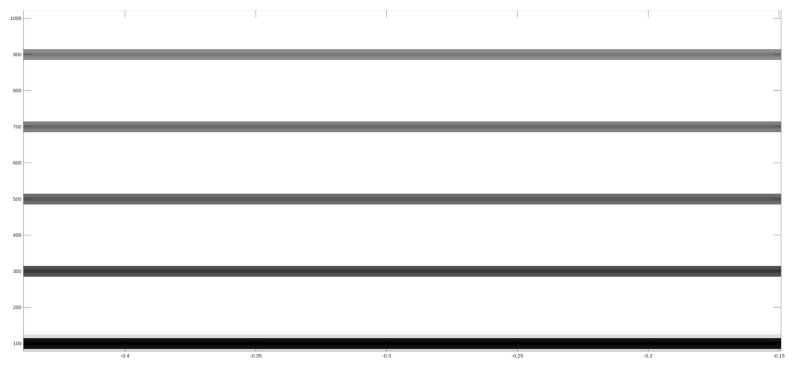

In [9]:
# display figure from saved image
img = Image.open("images/spectrogram_dB1_zoomed_in.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

Results: I am able to distinguish harmonic spectrum lines at 100 Hz, 300 Hz, 500 Hz, 700 Hz, ..., (2n + 1)$f_0$ where $f_0$ = 100 Hz is the fundamental frequency. 

### Part B

Generate a second triangle wave by changing the period to 20 msec. Then make the dB-Spectrogram of this 20-msec triangle wave, being careful to select the section duration as an integer number of periods. From the spectrogram, determine the fundamental frequency and also the frequency of the highest harmonic line. Also, determine the harmonic number for the highest frequency, e.g., the 17th or 31st, etc.

In [10]:
# Parameter definitions
DBrange = 80 # dB

fs    = 10000 # sampling rate
T     = 20e-3 # 20 ms period
tStop = 3 # total signal duration
Amp = 2 / T # gives triangle peak of 0.5

xx = gen_tri_wave(fs, tStop, T, Amp)

Tsect = 10*T # 0.05 seconds
Lsect =  Tsect * fs # 1000 samples

In [11]:
# Create figure
xx_mat = matlab.double(xx[:int(Lsect)].tolist())
plotspecDB(xx_mat, float(fs), float(Lsect), float(DBrange))

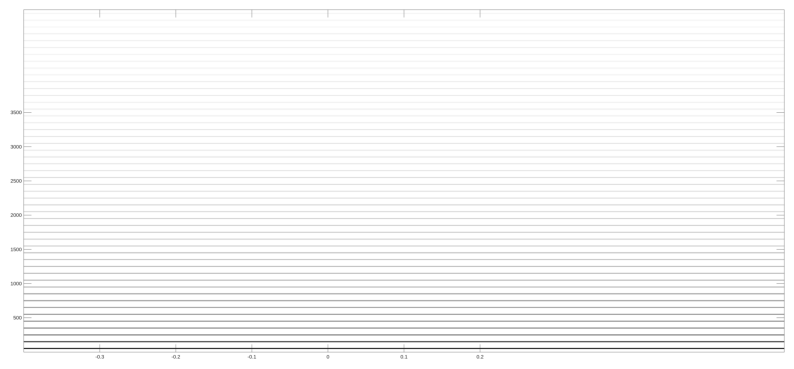

In [12]:
# display figure from saved image
img = Image.open("images/spectrogram_dB_20msec.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

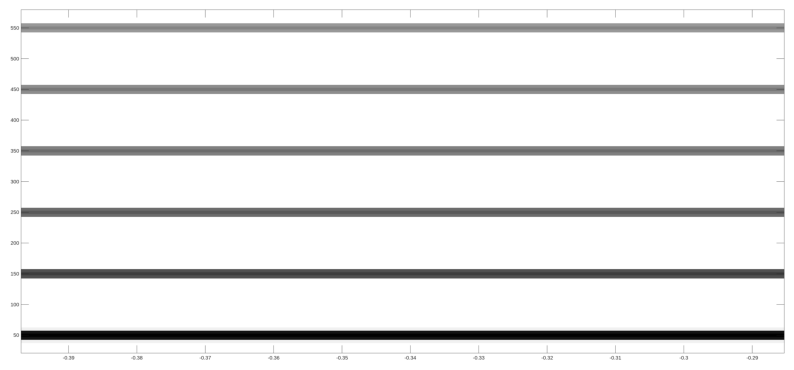

In [13]:
# display figure from saved image
img = Image.open("images/spectrogram_dB_20msec_zoomed_in.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

Results: Harmonic spectrum lines are visible at 50 Hz, 150 Hz, 250 Hz, 350 Hz, 450 Hz, 550 Hz, ..., (2n + 1)$f_0$ where $f_0$ = 50 Hz (fundamental frequency). The highest harmonic line was visible at 4950 Hz (Nyquist frequency was 5000 Hz) which should be the 99th harmonic. 

### Part C

For the 20-msec triangle wave, measure the amplitudes (in dB) of the first and third harmonic lines by using MATLAB’s Data Cursor after zooming in on those parts of the spectrogram image. Compare the dB difference to the ratio obtained in Section 2.2.1, part (f).

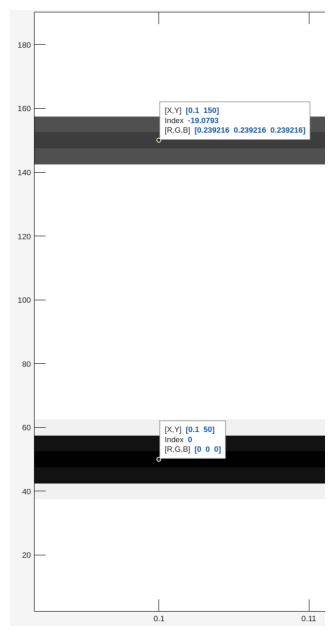

In [14]:
# display figure from saved image
img = Image.open("images/first_third_lines.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

Results: We can calculte the dB difference from the values at 'index' as seen in the image above. Therefore, $\Delta$ = -19.079 dB - 0 d = -19.1 dB which checks out with the results from problem 2.2.1 (refer to output of MATLAB code above).

### Part D

Change the period to 4msec and make another dB-Spectrogram. Be careful to select the section duration as an integer number of periods. This period is shorter but the frequency separation of the harmonic lines is greater. Notice that this inverse relationship was also true when comparing the 20msec case to the 10msec case.

In [15]:
# Parameter definitions
DBrange = 80 # dB

fs    = 10000 # sampling rate
T     = 4e-3 # 4 ms period
tStop = 3 # total signal duration
Amp = 2 / T # gives triangle peak of 0.5

xx = gen_tri_wave(fs, tStop, T, Amp)

Tsect = 10*T # 0.05 seconds
Lsect =  Tsect * fs # 1000 samples

In [18]:
# Create figure
xx_mat = matlab.double(xx[:int(Lsect)].tolist())
plotspecDB(xx_mat, float(fs), float(Lsect), float(DBrange))

> In plotspecDB (line 26)


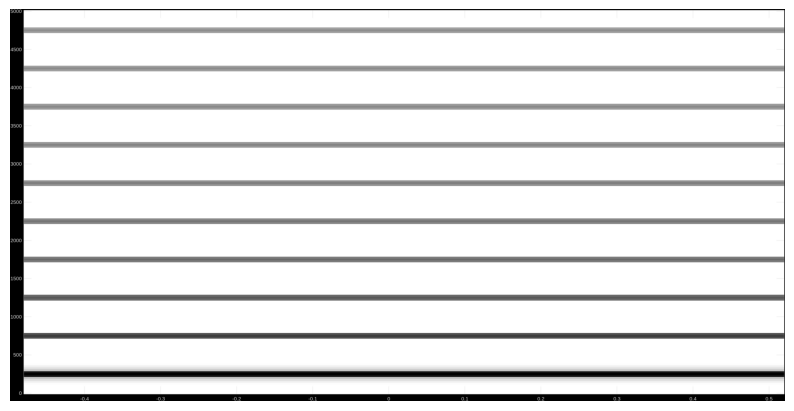

In [19]:
# display figure from saved image
img = Image.open("images/spectrogram_dB_4msec.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()